## CSCI3320 Assignment 3 Code ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import itertools

def generate_dataset(total_samples, num_distribution, intensity_ratio, mean_array, cov_array):
    data_array = []
    num_samples = {}
    for i in range(num_distribution):
        num_samples[i] = int(total_samples * intensity_ratio[i] / sum(intensity_ratio))
        data_array.append(np.random.multivariate_normal(mean_array[i], cov_array[i], num_samples[i]))

    dataset = np.vstack(data_array)
    labels = np.repeat(range(num_distribution), list(num_samples.values()))

    return dataset, labels

def plot_gmm(dataset, labels, title):
    plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap=plt.colormaps.get_cmap('rainbow'))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.show()

def calculate_precision_recall(labels, predicted_labels, n_components):
    precision = []
    recall = []
    for i in range(n_components):
        true_positive = np.sum((labels == i) & (predicted_labels == i))
        false_positive = np.sum((labels != i) & (predicted_labels == i))
        false_negative = np.sum((labels == i) & (predicted_labels != i))
        precision.append(true_positive / (true_positive + false_positive))
        recall.append(true_positive / (true_positive + false_negative))
    return precision, recall

def list_combination(input_list):
    unique_elements = sorted(set(input_list))
    permutations = itertools.permutations(unique_elements)
    output_list = []
    for perm in permutations:
        output = np.array([perm[unique_elements.index(x)] for x in input_list])
        output_list.append(output)
    return output_list

=== Task 1 ===


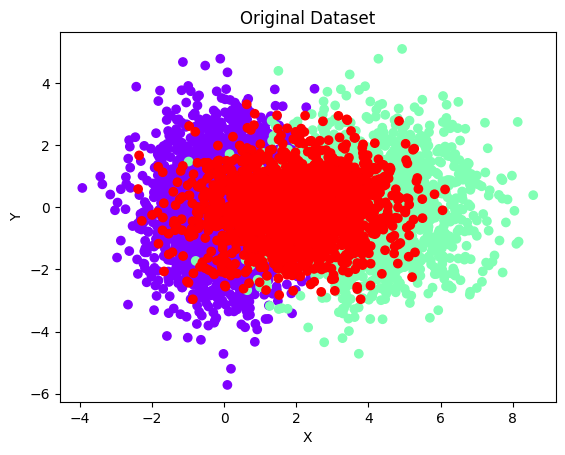

=== Task 2 ===
A possible predicted labels is:  [0 2 0 ... 0 2 2]
Precision:  [0.8290949887808526, 0.7901459854014599, 0.5621653777513385]
Recall:  [0.8623103850641773, 0.7578763127187864, 0.5513418903150525]
A possible predicted labels is:  [0 1 0 ... 0 1 1]
Precision:  [0.8290949887808526, 0.22843545508625818, 0.2086374695863747]
Recall:  [0.8623103850641773, 0.22403733955659277, 0.2001166861143524]
A possible predicted labels is:  [1 2 1 ... 1 2 2]
Precision:  [0.0012165450121654502, 0.011593118922961856, 0.5621653777513385]
Recall:  [0.0007779074290159471, 0.01808634772462077, 0.5513418903150525]
A possible predicted labels is:  [1 0 1 ... 1 0 0]
Precision:  [0.20939916716240334, 0.011593118922961856, 0.2086374695863747]
Recall:  [0.1369117075068067, 0.01808634772462077, 0.2001166861143524]
A possible predicted labels is:  [2 1 2 ... 2 1 1]
Precision:  [0.0012165450121654502, 0.22843545508625818, 0.1593118922961855]
Recall:  [0.0007779074290159471, 0.22403733955659277, 0.2485414235

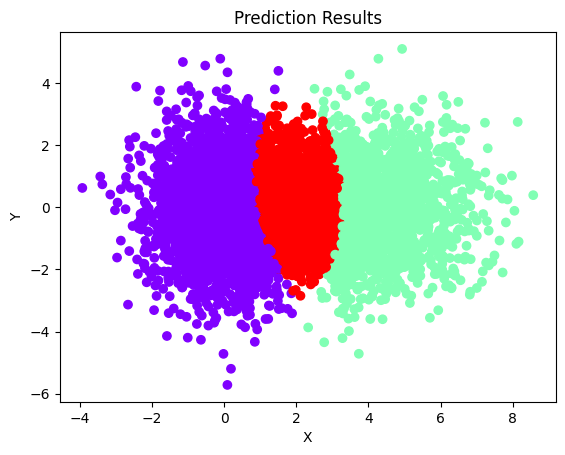

=== Task 3 ===
A possible predicted labels is:  [1 0 1 ... 0 0 2]
Precision (Full Covariance):  [0.7035755478662054, 0.026853473438412143, 0.3487460815047022]
Recall (Full Covariance):  [0.4745235316997277, 0.026837806301050177, 0.5192532088681447]
A possible predicted labels is:  [2 0 2 ... 0 0 1]
Precision (Full Covariance):  [0.7035755478662054, 0.6242163009404389, 0.22475189725627553]
Recall (Full Covariance):  [0.4745235316997277, 0.9294049008168028, 0.2246207701283547]
A possible predicted labels is:  [0 1 0 ... 1 1 2]
Precision (Full Covariance):  [0.7483946293053123, 0.04325259515570934, 0.3487460815047022]
Recall (Full Covariance):  [0.4986386619992221, 0.043757292882147025, 0.5192532088681447]
A possible predicted labels is:  [2 1 2 ... 1 1 0]
Precision (Full Covariance):  [0.027037617554858933, 0.04325259515570934, 0.22475189725627553]
Recall (Full Covariance):  [0.026837806301050177, 0.043757292882147025, 0.2246207701283547]
A possible predicted labels is:  [0 2 0 ... 2 2 1

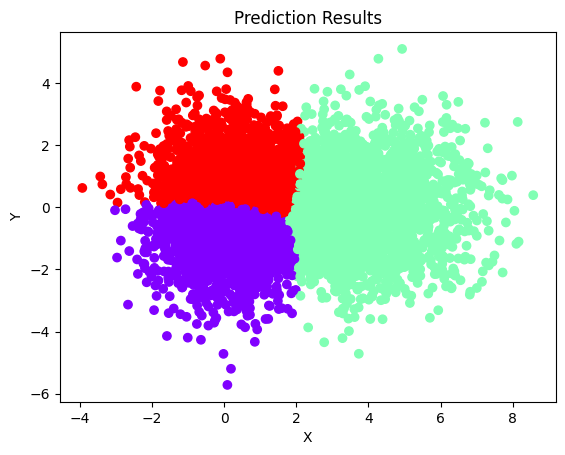

=== Task 4 ===
!--! component_numbers = 2 !--!


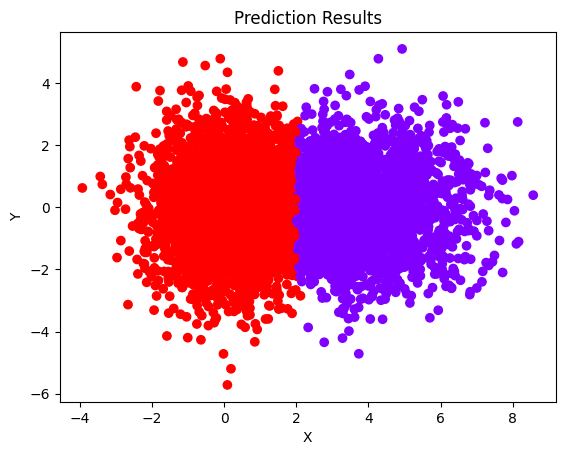

!--! component_numbers = 3 !--!


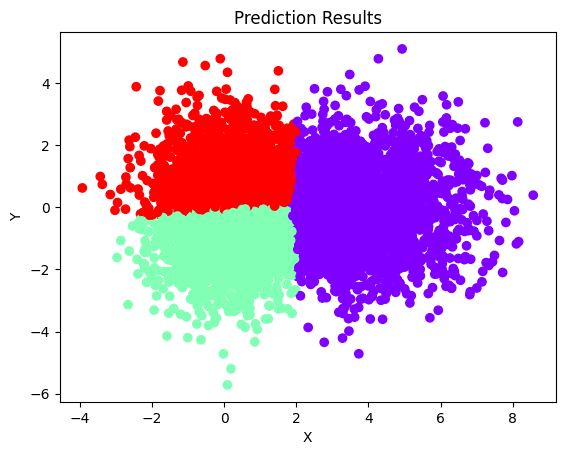

!--! component_numbers = 10 !--!


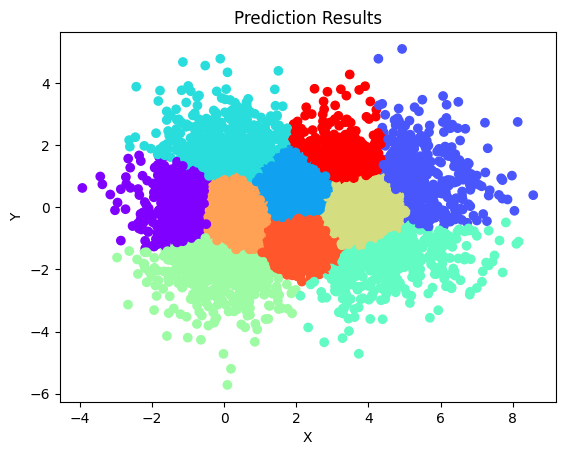

!--! component_numbers = 100 !--!


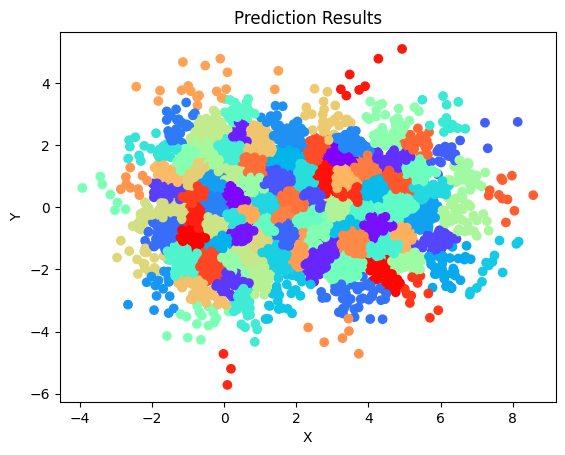

In [2]:
# Task 1: Generate and visualize the dataset
print("=== Task 1 ===")
dataset, labels = generate_dataset(6000, 3, [3,2,2], [[0,0], [4,0], [2,0]], [np.diag([1,2]), np.diag([2,2]), np.diag([2,1])])
plot_gmm(dataset, labels, "Original Dataset")

# Task 2: Fit Gaussian Mixture Model with three components and calculate precision and recall
print("=== Task 2 ===")
gmm = GaussianMixture(n_components=3)
gmm.fit(dataset)
predicted_labels = gmm.predict(dataset)
predicted_labels_combination = list_combination(predicted_labels)
precision_max = 0.00
for predicted_labels_match in predicted_labels_combination:
    print("A possible predicted labels is: ", predicted_labels_match)
    precision, recall = calculate_precision_recall(labels, predicted_labels_match, 3)
    print("Precision: ", precision)
    print("Recall: ", recall)
    precision_sum = np.sum(precision)
    if precision_sum > precision_max:
        precision_max = precision_sum
        predicted_labels = predicted_labels_match
print("-- Result --")
print("The predicted labels with maximum precision is: ", predicted_labels)
precision, recall = calculate_precision_recall(labels, predicted_labels, 3)
print("Precision: ", precision)
print("Recall: ", recall)
plot_gmm(dataset, predicted_labels, "Prediction Results")

# Task 3: Fit Gaussian Mixture Model without assuming diagonal covariance matrices and calculate precision and recall
print("=== Task 3 ===")
gmm_full = GaussianMixture(n_components=3, covariance_type='full')
gmm_full.fit(dataset)
predicted_labels_full = gmm_full.predict(dataset)
predicted_labels_full_combination = list_combination(predicted_labels_full)
precision_full_max = 0.00
for predicted_labels_full_match in predicted_labels_full_combination:
    print("A possible predicted labels is: ", predicted_labels_full_match)
    precision_full, recall_full = calculate_precision_recall(labels, predicted_labels_full_match, 3)
    print("Precision (Full Covariance): ", precision_full)
    print("Recall (Full Covariance): ", recall_full)
    precision_full_sum = np.sum(precision_full)
    if precision_full_sum > precision_full_max:
        precision_full_max = precision_full_sum
        predicted_labels_full = predicted_labels_full_match
print("-- Result --")
print("The predicted labels with maximum precision is: ", predicted_labels_full)
precision_full, recall_full = calculate_precision_recall(labels, predicted_labels_full, 3)
print("Precision (Full Covariance): ", precision_full)
print("Recall (Full Covariance): ", recall_full)
plot_gmm(dataset, predicted_labels_full, "Prediction Results")

# Task 4: Fit Gaussian Mixture Model with different component numbers and visualize the results
print("=== Task 4 ===")
component_numbers = [2, 3, 10, 100]
for num_components in component_numbers:
    print(f'!--! component_numbers = {num_components} !--!')
    gmm = GaussianMixture(n_components=num_components, covariance_type='full')
    gmm.fit(dataset)
    predicted_labels_components = gmm.predict(dataset)
    #predicted_labels_components_combination = list_combination(predicted_labels_components)
    #precision_components_max = 0.00
    #for predicted_labels_components_match in predicted_labels_components_combination:
    #    print("A possible predicted labels is: ", predicted_labels_components_match)
    #    precision_components, recall_components = calculate_precision_recall(labels, predicted_labels_components_match, 3)
    #    print("Precision (Full Covariance): ", precision_components)
    #    print("Recall (Full Covariance): ", recall_components)
    #    precision_components_sum = np.sum(precision_components)
    #    if precision_components_sum > precision_components_max:
    #        precision_components_max = precision_components_sum
    #        predicted_labels_components = predicted_labels_components_match
    #print("-- Result --")
    #print("The predicted labels with maximum precision is: ", predicted_labels_components)
    #precision_components, recall_components = calculate_precision_recall(labels, predicted_labels_components, num_components)
    #print("Precision (Full Covariance): ", precision_components)
    #print("Recall (Full Covariance): ", recall_components)
    plot_gmm(dataset, predicted_labels_components, "Prediction Results")